## <b>Micro-Credit Defaulter - Telecom Sector </b>

In [1]:
## Importing Neccessary Libraries
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset CSV file using pandas
df= pd.read_csv('sample_data_intw.csv')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 209593
No. of Columns : 36


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


- **label** : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- **msisdn** : mobile number of user
- **aon** : age on cellular network in days
- **daily_decr30** : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- **daily_decr90** : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- **rental30** : Average main account balance over last 30 days
- **rental90** : Average main account balance over last 90 days
- **last_rech_date_ma** : Number of days till last recharge of main account
- **last_rech_date_da**: Number of days till last recharge of data account
- **last_rech_amt_ma** : Amount of last recharge of main account (in Indonesian Rupiah)
- **cnt_ma_rech30** : Number of times main account got recharged in last 30 days
- **fr_ma_rech30** : Frequency of main account recharged in last 30 days
- **sumamnt_ma_rech30** : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- **medianamnt_ma_rech30** : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- **medianmarechprebal30** : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- **cnt_ma_rech90** : Number of times main account got recharged in last 90 days
- **fr_ma_rech90** : Frequency of main account recharged in last 90 days
- **sumamnt_ma_rech90** : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- **medianamnt_ma_rech90** : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- **medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- **cnt_da_rech30** : Number of times data account got recharged in last 30 days
- **fr_da_rech30**: Frequency of data account recharged in last 30 days
- **cnt_da_rech90** : Number of times data account got recharged in last 90 days
- **fr_da_rech90** : Frequency of data account recharged in last 90 days
- **cnt_loans30** : Number of loans taken by user in last 30 days
- **amnt_loans30** : Total amount of loans taken by user in last 30 days
- **maxamnt_loans30** : maximum amount of loan taken by the user in last 30 days
- **medianamnt_loans30** : Median of amounts of loan taken by the user in last 30 days
- **cnt_loans90** : Number of loans taken by user in last 90 days
- **amnt_loans90** : Total amount of loans taken by user in last 90 days
- **maxamnt_loans90** : maximum amount of loan taken by the user in last 90 days
- **medianamnt_loans90** : Median of amounts of loan taken by the user in last 90 days
- **payback30** : Average payback time in days over last 30 days
- **payback90** : Average payback time in days over last 90 days
- **pcircle** : telecom circle
- **pdate** : date

In [4]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle', 'pdate']}

#### Observation:
- This dataset contain 209593 rows and 37 columns.
- We have 3 features with object datatype and rest features are int64.
- Our target feature is label with int datatype.
- The feature `pdate` is column which contains date type values so we will split it into months , year etc 

In [5]:
# Converting Date datatypes and spliting date into date, month and year.
df['pdate']=pd.to_datetime(df['pdate'])
df['Day']=df['pdate'].apply(lambda x:x.day)
df['Month']=df['pdate'].apply(lambda x:x.month)
df['year']=df['pdate'].apply(lambda x:x.year)

#Droping pdate column after extraction
df.drop(['pdate'],axis=1,inplace=True)

In [6]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month,Year
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7,2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8,10,2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8,2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6,2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6,2016


In [7]:
df['year'].value_counts()

2016    209593
Name: Year, dtype: int64

In [8]:
## Since we have only single value in year we will just drop the feature
df.drop(['year'],axis=1,inplace=True)

### Checking Data Integrity

In [9]:
df.duplicated().sum() # This will check the duplicate data for all columns.

1

In [10]:
df.duplicated('msisdn').sum()  # This will check the duplicate data for all columns.

23350

- There 23350 rows with duplicate mobile number.
- There 1 row with completely duplicate values of all features.

**Since training model on duplicate records will affect accuracy as well as it will increase computational resources consumption and computational time.**

- For eariler 23350 entry it can possible that same mobile number is switch to other customer and another observation is for these duplicate entries features values are different.

- We will drop 1 row duplicate entry before going further.

In [11]:
# Droping duplicate entries
df.drop_duplicates(keep='last',inplace=True)

In [12]:
df.shape

(209592, 37)

##### Check for presense of any whitespaces, '?', 'NA', '-' in dataset

In [13]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

###### **No White space, 'NA', '-' exist in dataset.**

#### Missing Value Check

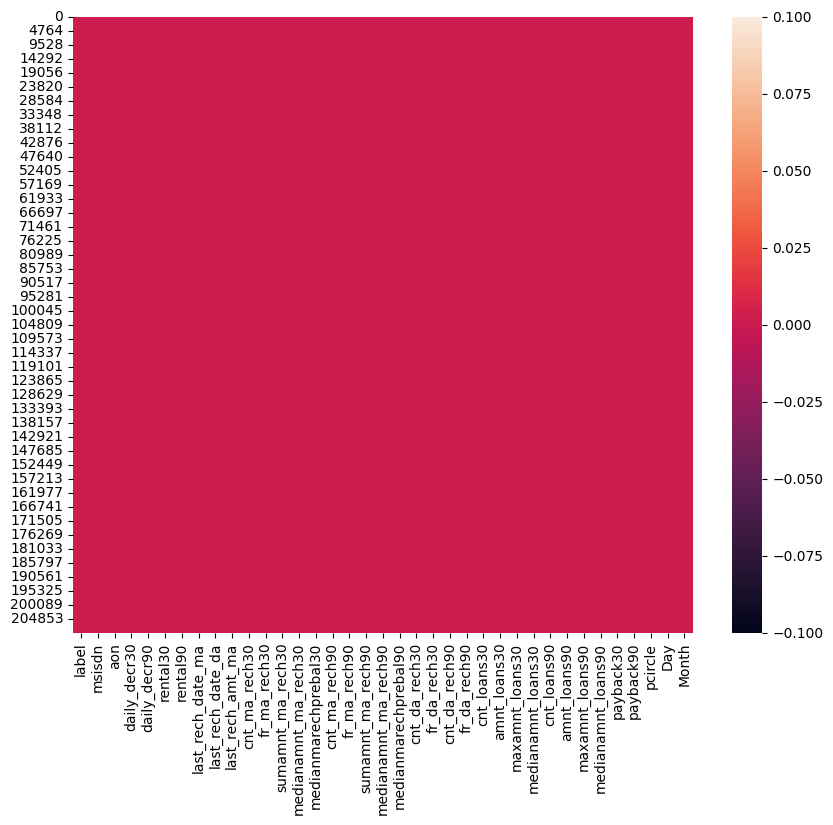

In [14]:
sns.set_palette('coolwarm')
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.show()

##### There seems to no missing values in the Dataset so we will proceed

#### Statistical Matrix

In [15]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
label,209592.000000,0.875177,0.330519,0.000000,1.000000,1.000000,1.000000,1.000000
aon,209592.000000,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.000000,999860.755200
daily_decr30,209592.000000,5381.412999,9220.644093,-93.012667,42.439500,1469.091834,7244.096000,265926.000000
daily_decr90,209592.000000,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.795000,320630.000000
rental30,209592.000000,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.945000,198926.110000
rental90,209592.000000,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.792500,200148.110000
last_rech_date_ma,209592.000000,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.000000,998650.377700
last_rech_date_da,209592.000000,3712.220632,53374.960144,-29.000000,0.000000,0.000000,0.000000,999171.809400
last_rech_amt_ma,209592.000000,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.000000,55000.000000
cnt_ma_rech30,209592.000000,3.978053,4.256099,0.000000,1.000000,3.000000,5.000000,203.000000


In [16]:
df.describe(include=object)

,msisdn,pcircle
count,209592,209592
unique,186243,1
top,04581I85330,UPW
freq,7,209592


#### Observation:
- For all features value of mean is greater than median, indicating that there is skewness.
- `pcircle` contains single unique value, so we will drop this feature.
- The features aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, cnt_da_rech30, fr_da_rech30, last_rech_amt_ma, maxamnt_loans30, cnt_loans90, payback30, payback90 contain outliers as there are lot difference in max columns and 75% columns.
- aon, daily_decr30, daily_decr90 ,rental30, rental30, last_rech_date_ma, last_rech_date_da, medianmarechprebal90, medianmarechprebal30 features contain negative values in minimum column.
- Maximum aon (age on cellular network in days) observed is 999860.755168 and the minimum is -48.

### Data Cleaning 

In [17]:
df['aon'].describe()

count    209592.000000
mean       8112.380399
std       75696.261220
min         -48.000000
25%         246.000000
50%         527.000000
75%         982.000000
max      999860.755200
Name: aon, dtype: float64

In [18]:
999860/365

2739.3424657534247

In [19]:
df[df['aon']<0].value_counts().sum()

1539

In [20]:
df[df['aon'] > 3650].value_counts().sum()  # Assume people stay one network for 10 years.

2089

- There are some negative values in minimum column while there is lot of difference between 75% and max column.Max values is 999860days which means 2739.34 year which is not possible at all.

- There are 1539 entries with value less than 0.

- So Feature aon contain error. To resolve this error we are going to handle upper limit through outlier removal.


##### There are lot of features which have negative values and higher max value compare to 75 percentile.There is need of some kind common Strategy to handle them based on certain assumption.

### Handling Data error in min max columns.
- **Assumption- All negative values are typing error happen accidentally by type - in front of original value (except feature depicting median).**
    - **Negative values are converted into absolute value to correct negative typing error whenever applicable except feature depicting median.**
    - **Upper limit of these features handle by outlier removal.**

##### We will convert Negative values to absolute values

In [21]:
#Converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['last_rech_date_da']=abs(df['last_rech_date_da'])

### Handling data error in `maxamnt_loans30`

**maxamnt_loans30** : maximum amount of loan taken by the user in last 30 days

In [22]:
df['maxamnt_loans30'].describe()

count    209592.000000
mean        274.660029
std        4245.274734
min           0.000000
25%           6.000000
50%           6.000000
75%           6.000000
max       99864.560860
Name: maxamnt_loans30, dtype: float64

**We already know maximum loan amount taken by customers can be 0,5,10 and which can be repay with amount of 0,6,12. We gone replace values greater than 12 into category of zero.**

**We are making assumption here that loan amount greater than 12 to be replace with zero.**

In [23]:
# marking values greater than 12 and assign value zero to them.

df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0)
       & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0

In [24]:
df['maxamnt_loans30'].value_counts()

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

### Handling negative minimum values in `medianmarechprebal30` and `medianmarechprebal90`

**medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

**medianmarechprebal90** : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- **Observation** :
    - **The median of main account balance can be negative.**
    - **There are some very large positive values in the variable. These could be natural outliers.**

### Handling extreme max values in `cnt_loans30` &` cnt_loans90`
`cnt_loans30` : Number of loans taken by user in last 30 days

`cnt_loans90` : Number of loans taken by user in last 90 days

- **Observation**:
    **There are no information about any restrictions on the number of times a customer can avail loans. Hence these extreme values can be considered as realistic.**

#### We have successfully removed the negative values in the dataset so i will save it new csv file to keep the original dataset unchanged

In [25]:
# Saving error free data to new CSV file with name Clean_data_file
df.to_csv('Negative_removed.csv',sep=',',index=False)

In [26]:
## Importing the Dataset
df=pd.read_csv('Negative_removed.csv')

In [27]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 209592
No. of Columns : 37


,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Day,Month
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20,7
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19,8
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22,6


### Exploratory Data Analysis

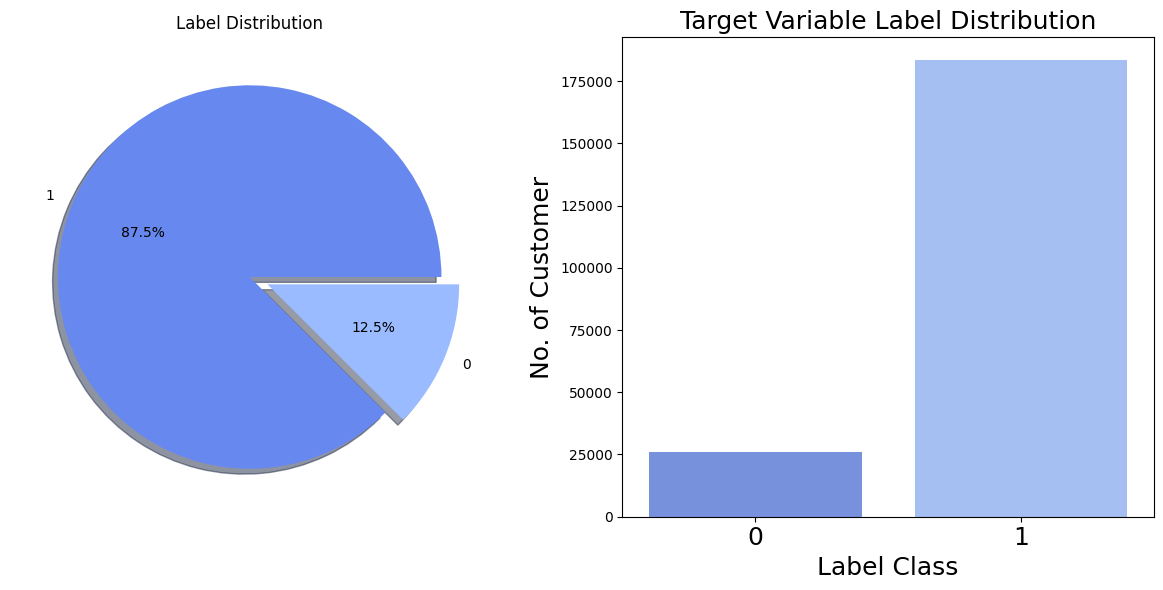

In [30]:
#Counting the number of defaulter and non-defaulter
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(12,6))

df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('Label Distribution')
ax[0].set_ylabel('')

sns.countplot('label',data=df,ax=ax[1])
ax[1].set_title('Target Variable Label Distribution',fontsize=18)
ax[1].set_xlabel("Label Class",fontsize=18)
ax[1].set_ylabel("No. of Customer",fontsize=18,)
plt.xticks(fontsize=18)
plt.show()

- Label class 1 represent Non-defaulter while Label class 0 represent Defaulter i.e. Loan not paid
- We can see Most of customers are Non-defaulter while very few are defaulter.
- From ML model building point of view target variable is imbalanced data case.

#### Observation :

- **Most of data belong to month 6 and 7, followed my month 8.**
- **We can see very few defaulter in month 8.**

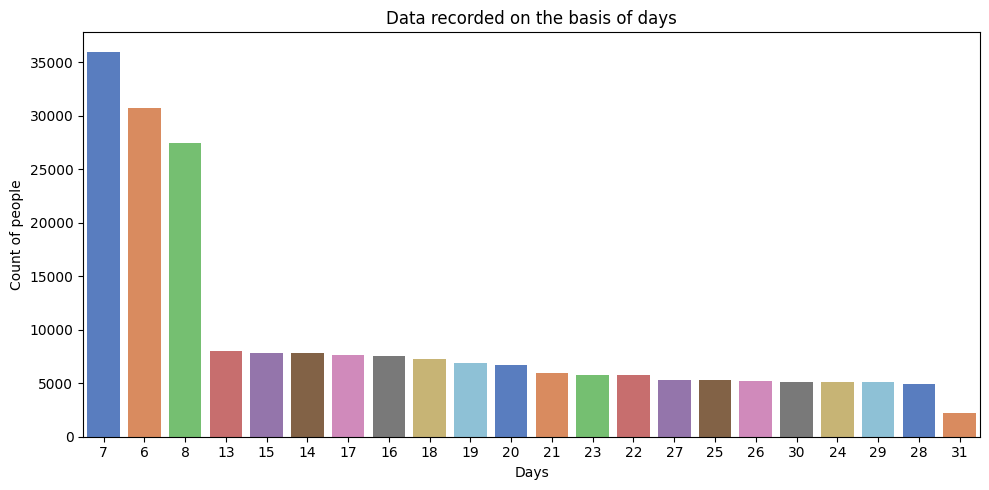

In [32]:
sns.set_style()
plt.figure(figsize=(10,5))
sns.countplot(x='Day',data=df,palette='muted',order= df['Day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

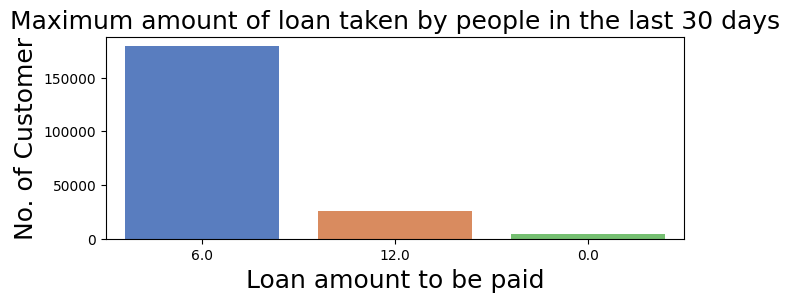

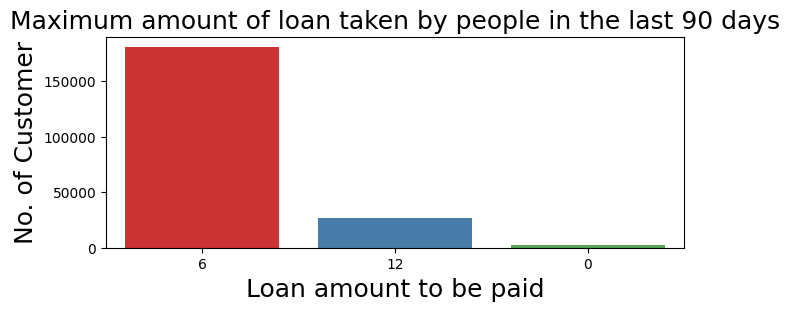

6.0     179192
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64


6     180944
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


In [35]:
#Maximum amount of loan taken by people in last 30 and 90 days
plt.figure(figsize = (7,8))
plt.subplot(311)
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days',fontsize=18)
plt.xlabel('Loan amount to be paid',fontsize=18)
plt.ylabel('No. of Customer',fontsize=18)
plt.show()

plt.figure(figsize = (7,8))
plt.subplot(312)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days',fontsize=18)
plt.xlabel('Loan amount to be paid',fontsize=18)
plt.ylabel('No. of Customer',fontsize=18)
plt.show()
print(df['maxamnt_loans30'].value_counts())
print('\n')
print(df['maxamnt_loans90'].value_counts())

#### Observations:

1. In 30 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 179192 whereas the  number of people had not taken loan and their number is 4291.

2. In 90 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 180944 whereas the number of people had not taken loan and their number is 2043.

3. Maximum number of people had taken 12Rs as the loan amount within 90 days and their number is 26605 whereas for 30 days the number of people who had taken 12Rs is 26109 respectively.
**This means customer mostly opt for 6 Rs Loan.**

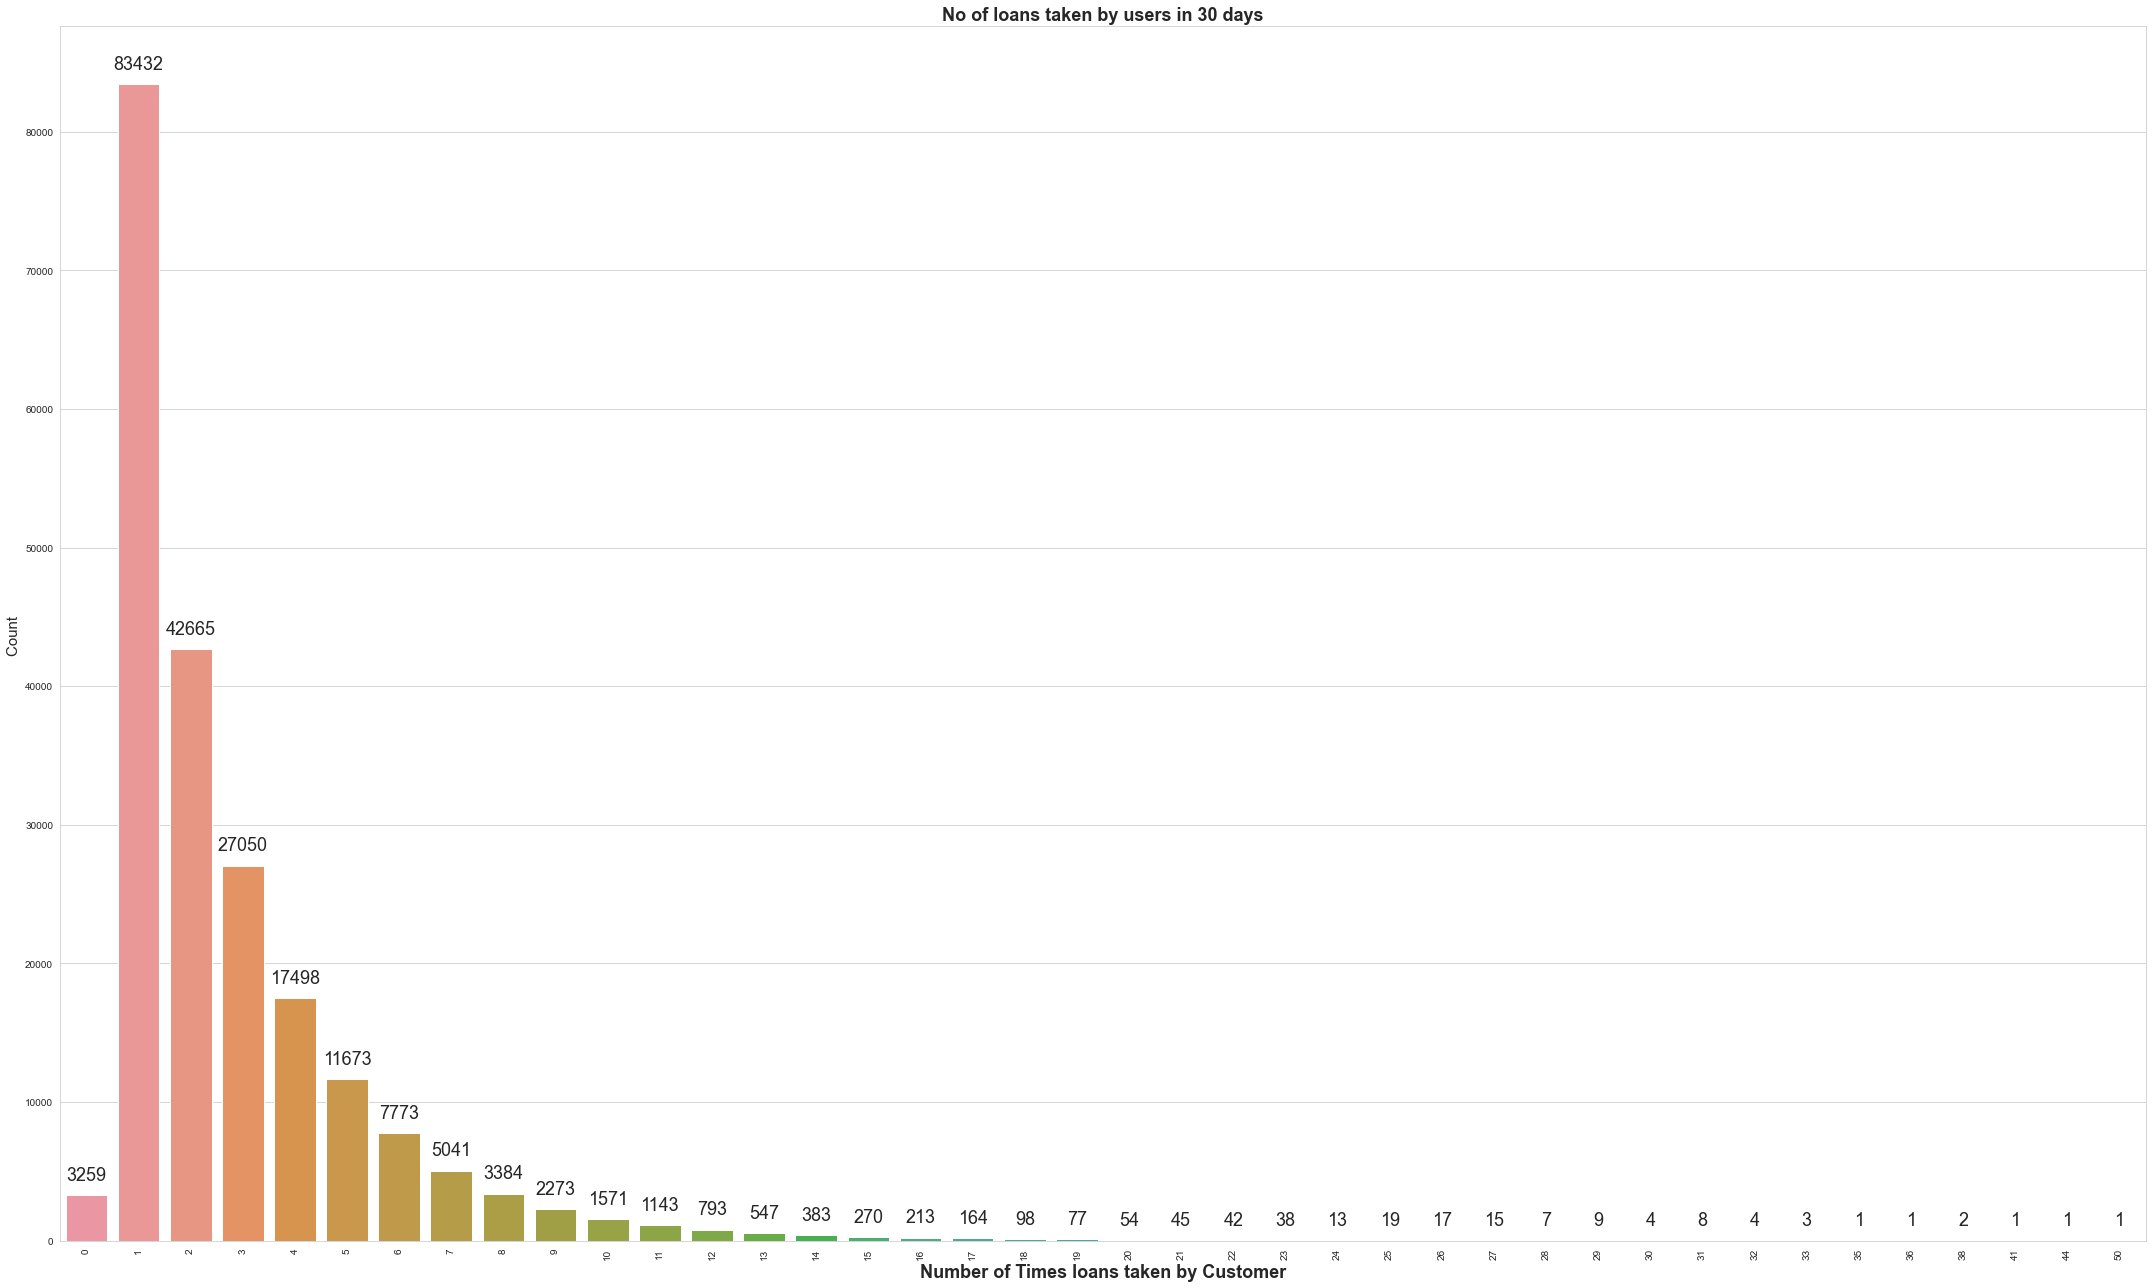

In [75]:
plt.figure(figsize=(30,18))
pd =sns.countplot(x = "cnt_loans30" ,  data=df)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 20), textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Number of Times loans taken by Customer",fontsize=18)
plt.ylabel("Count " ,size=15)
plt.title ("No of loans taken by users in 30 days" ,fontsize=18)
plt.tight_layout()
plt.show()

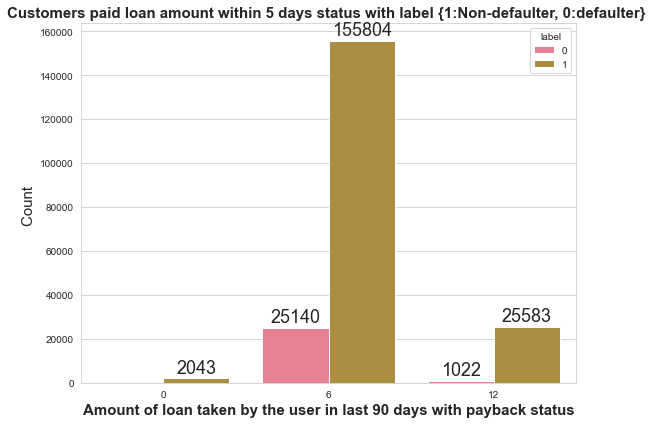

In [100]:
plt.figure(figsize=(8,6))
pd =sns.countplot(x = "maxamnt_loans90" ,  data=df  , hue= 'label')
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', size=18, xytext = (0, 10), textcoords = 'offset points')
plt.xlabel("Amount of loan taken by the user in last 90 days with payback status",fontsize=15)
plt.ylabel("Count " ,size=15)
plt.title ("Customers paid loan amount within 5 days status with label {1:Non-defaulter, 0:defaulter} "
           ,fontsize=15)
plt.tight_layout()
plt.show()

**Very few defaulter in customers who take loan in amount of 12.**

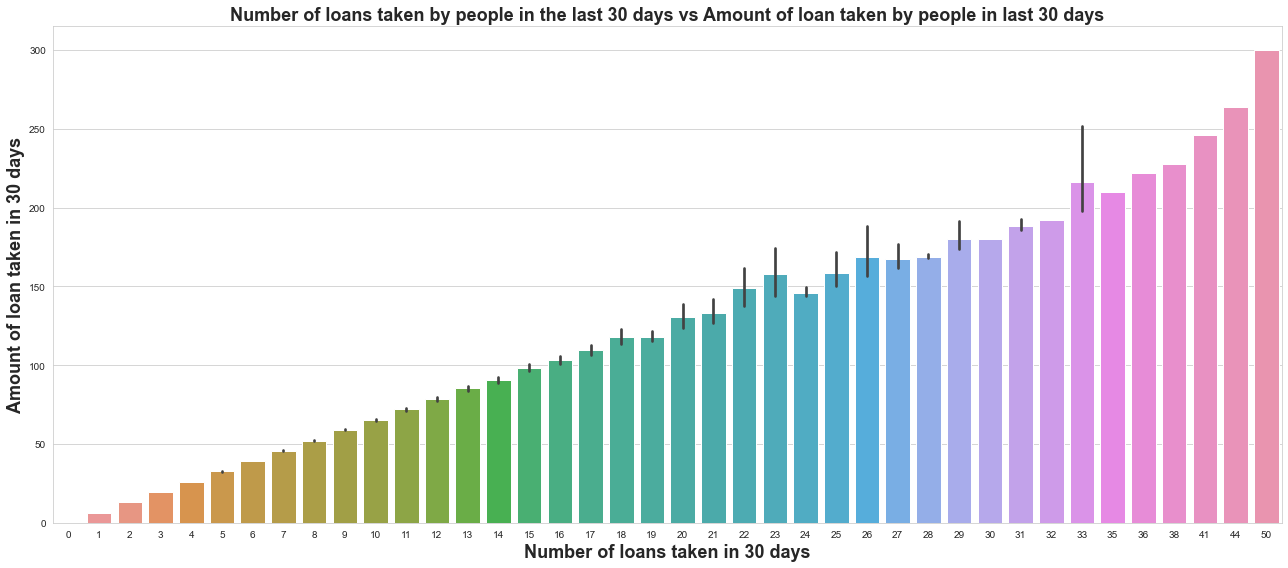

In [84]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans30', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 30 days',fontsize=18)
plt.xlabel('Number of loans taken in 30 days',fontsize=18)
plt.ylabel('Amount of loan taken in 30 days',fontsize=18)
plt.show()

- **Maximum number of loans taken by the people is 50 and the Average loan amount is equivalent to 300.**

- **Minimum number of loans taken by the people is 0.**

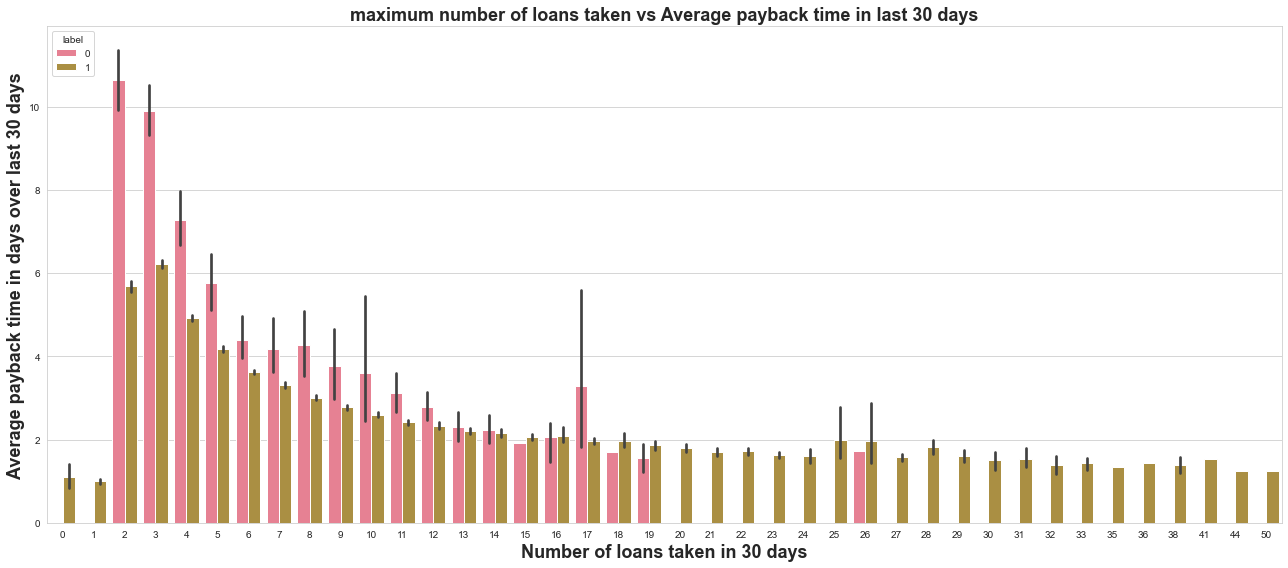

In [85]:
#Checking the maximum number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)
plt.title('maximum number of loans taken vs Average payback time in last 30 days',fontsize=18)
plt.xlabel('Number of loans taken in 30 days',fontsize=18)
plt.ylabel('Average payback time in days over last 30 days',fontsize=18)
plt.show()

**Average payback time over last 30 days is higher for people who had taken 2 times the loan and say that the users with less number of loan taking are more than the defaulters**

<Figure size 1080x576 with 0 Axes>

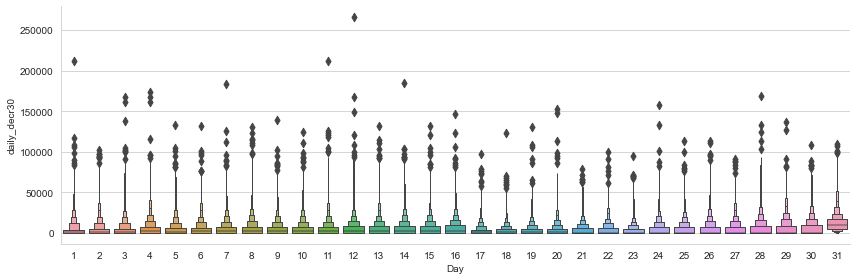

In [88]:
plt.figure(figsize=(15,8))
sns.catplot(y = "daily_decr30", x = "Day", data = df.sort_values("daily_decr30", ascending = False),
            kind="boxen", height = 4, aspect = 3)
plt.show()

### Feature Enginnering

In [36]:
# As we have 37 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['label', 'last_rech_amt_ma', 'cnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', 'Day', 'Month'], float64: ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'], object: ['msisdn', 'pcircle']}

In [37]:
#Droping PCircle and msisdn column as they are unnecessary for further investigation
df.drop(['msisdn', 'pcircle'],axis=1,inplace=True)

#### 1. Outliers Detection and Removal

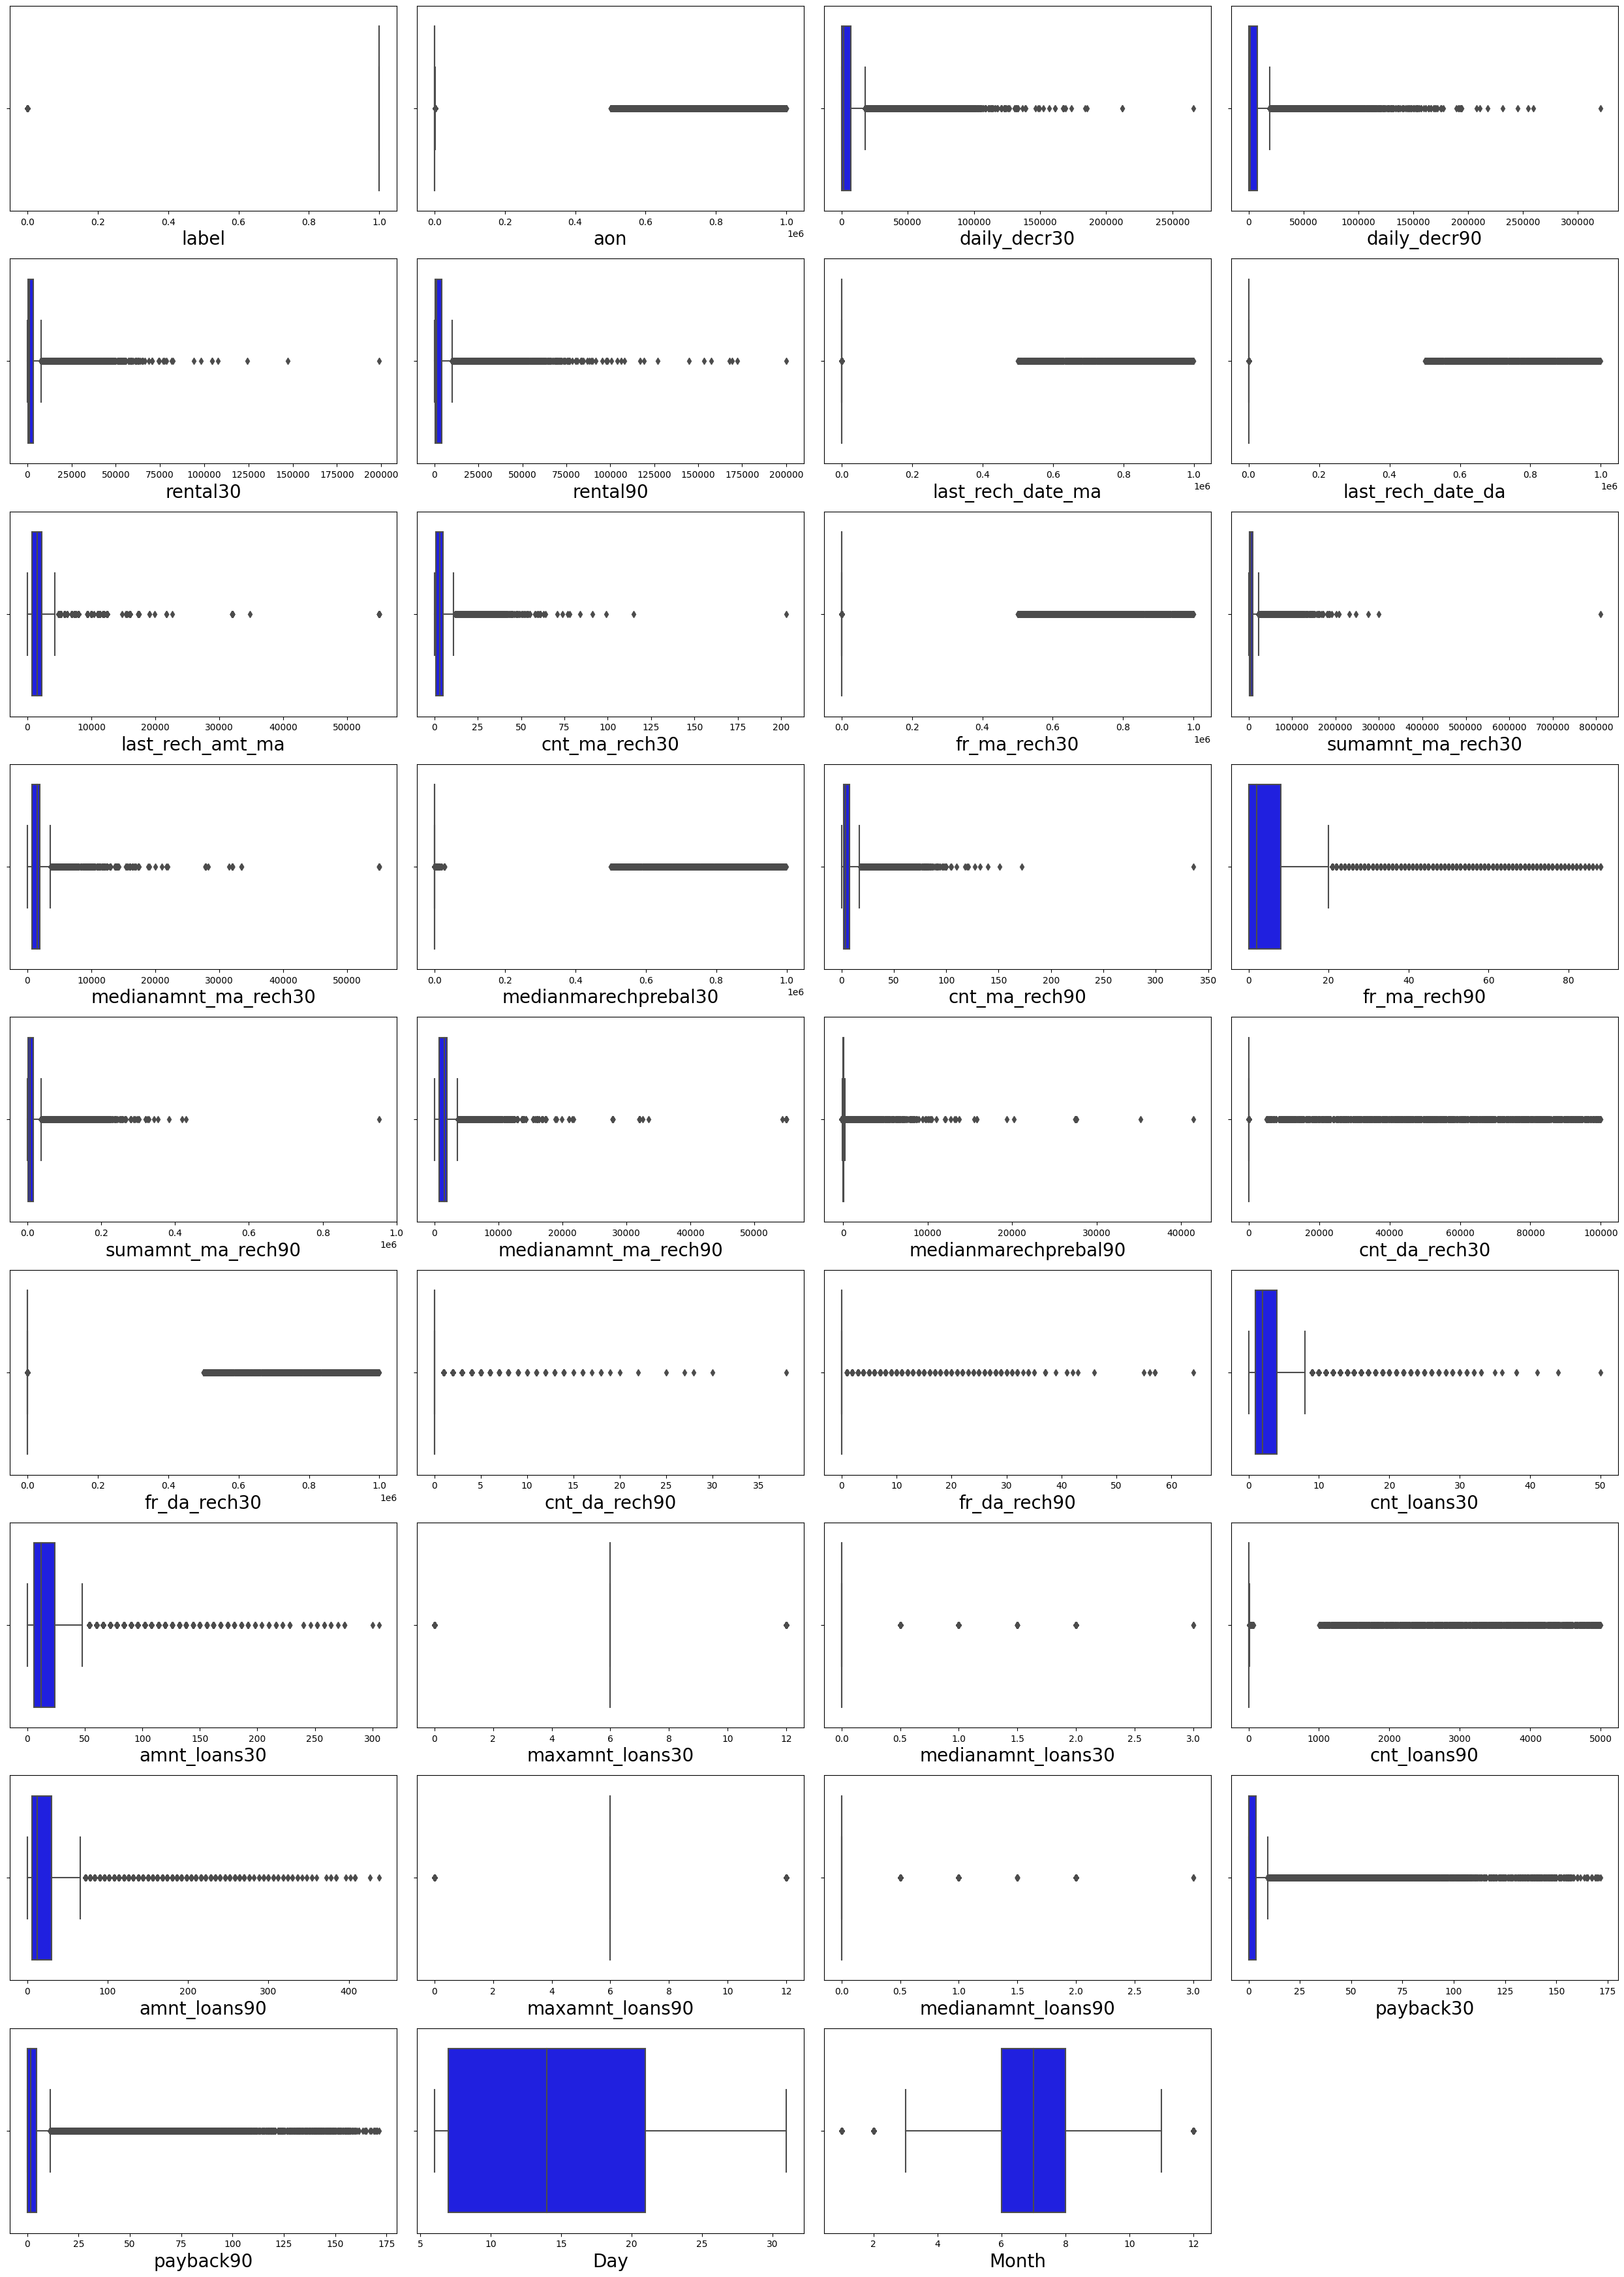

In [39]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

- There seems to be Outliers in the Dataset

##### Outliers removal using Zscore method

In [40]:
df1 = df.copy()

In [41]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df2 = df1[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df1.shape)
print ("Shape of the dataframe after removing outliers: ", df2.shape)
print ("Percentage of data loss post outlier removal: ", (df1.shape[0]-df2.shape[0])/df1.shape[0]*100)

df1=df2.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (209592, 35)
Shape of the dataframe after removing outliers:  (160499, 35)
Percentage of data loss post outlier removal:  23.42312683690217


**If we use Z-Score to remove the Outliers we will loose huge amount of Data which is not acceptable**

### Observations :
- Presence of Outliers
- There are no outliers in lower capping level.
- So we will use Quantile-based Flooring and Capping technique.

### **We will use Quantile - based Flooring and Capping technique for Handling the Outliers. 

- In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values.**

#### In this dataset, we will set the flooring at 0th percentile for lower bound and capping at 99th percentile for upper bound.

- Upper bound set as 99th percentile as most of values in dataset are realistic but still there are few very extreme values
- No Outliers in lower bound so Lower bound is set as 0th percentile.

In [42]:
df1 = df.copy()
Q1 = df1.quantile(0)
Q3= df1.quantile(0.99)
IQR = Q3 - Q1

In [43]:
IQR

label                       1.000000
aon                      2419.090000
daily_decr30            41730.620000
daily_decr90            49967.457800
rental30                19466.008500
rental90                26997.976500
last_rech_date_ma          57.000000
last_rech_date_da          56.000000
last_rech_amt_ma        10000.000000
cnt_ma_rech30              20.000000
fr_ma_rech30               26.000000
sumamnt_ma_rech30       46857.620000
medianamnt_ma_rech30    10000.000000
medianmarechprebal30     1531.545000
cnt_ma_rech90              33.000000
fr_ma_rech90               54.000000
sumamnt_ma_rech90       78717.270000
medianamnt_ma_rech90    10000.000000
medianmarechprebal90     1040.199700
cnt_da_rech30               1.000000
fr_da_rech30                0.000000
cnt_da_rech90               1.000000
fr_da_rech90                0.000000
cnt_loans30                12.000000
amnt_loans30               84.000000
maxamnt_loans30            12.000000
medianamnt_loans30          1.000000
c

In [44]:
data = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(198174, 35)


##### Checking the Data Loss

In [45]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((209592-198174)/209592)*100,'%')

Percentage Data Loss : 5.447727012481392 %


**Using Capping method we have only 5.44% Dataloss which is acceptable**

### 2. Checking Skewness

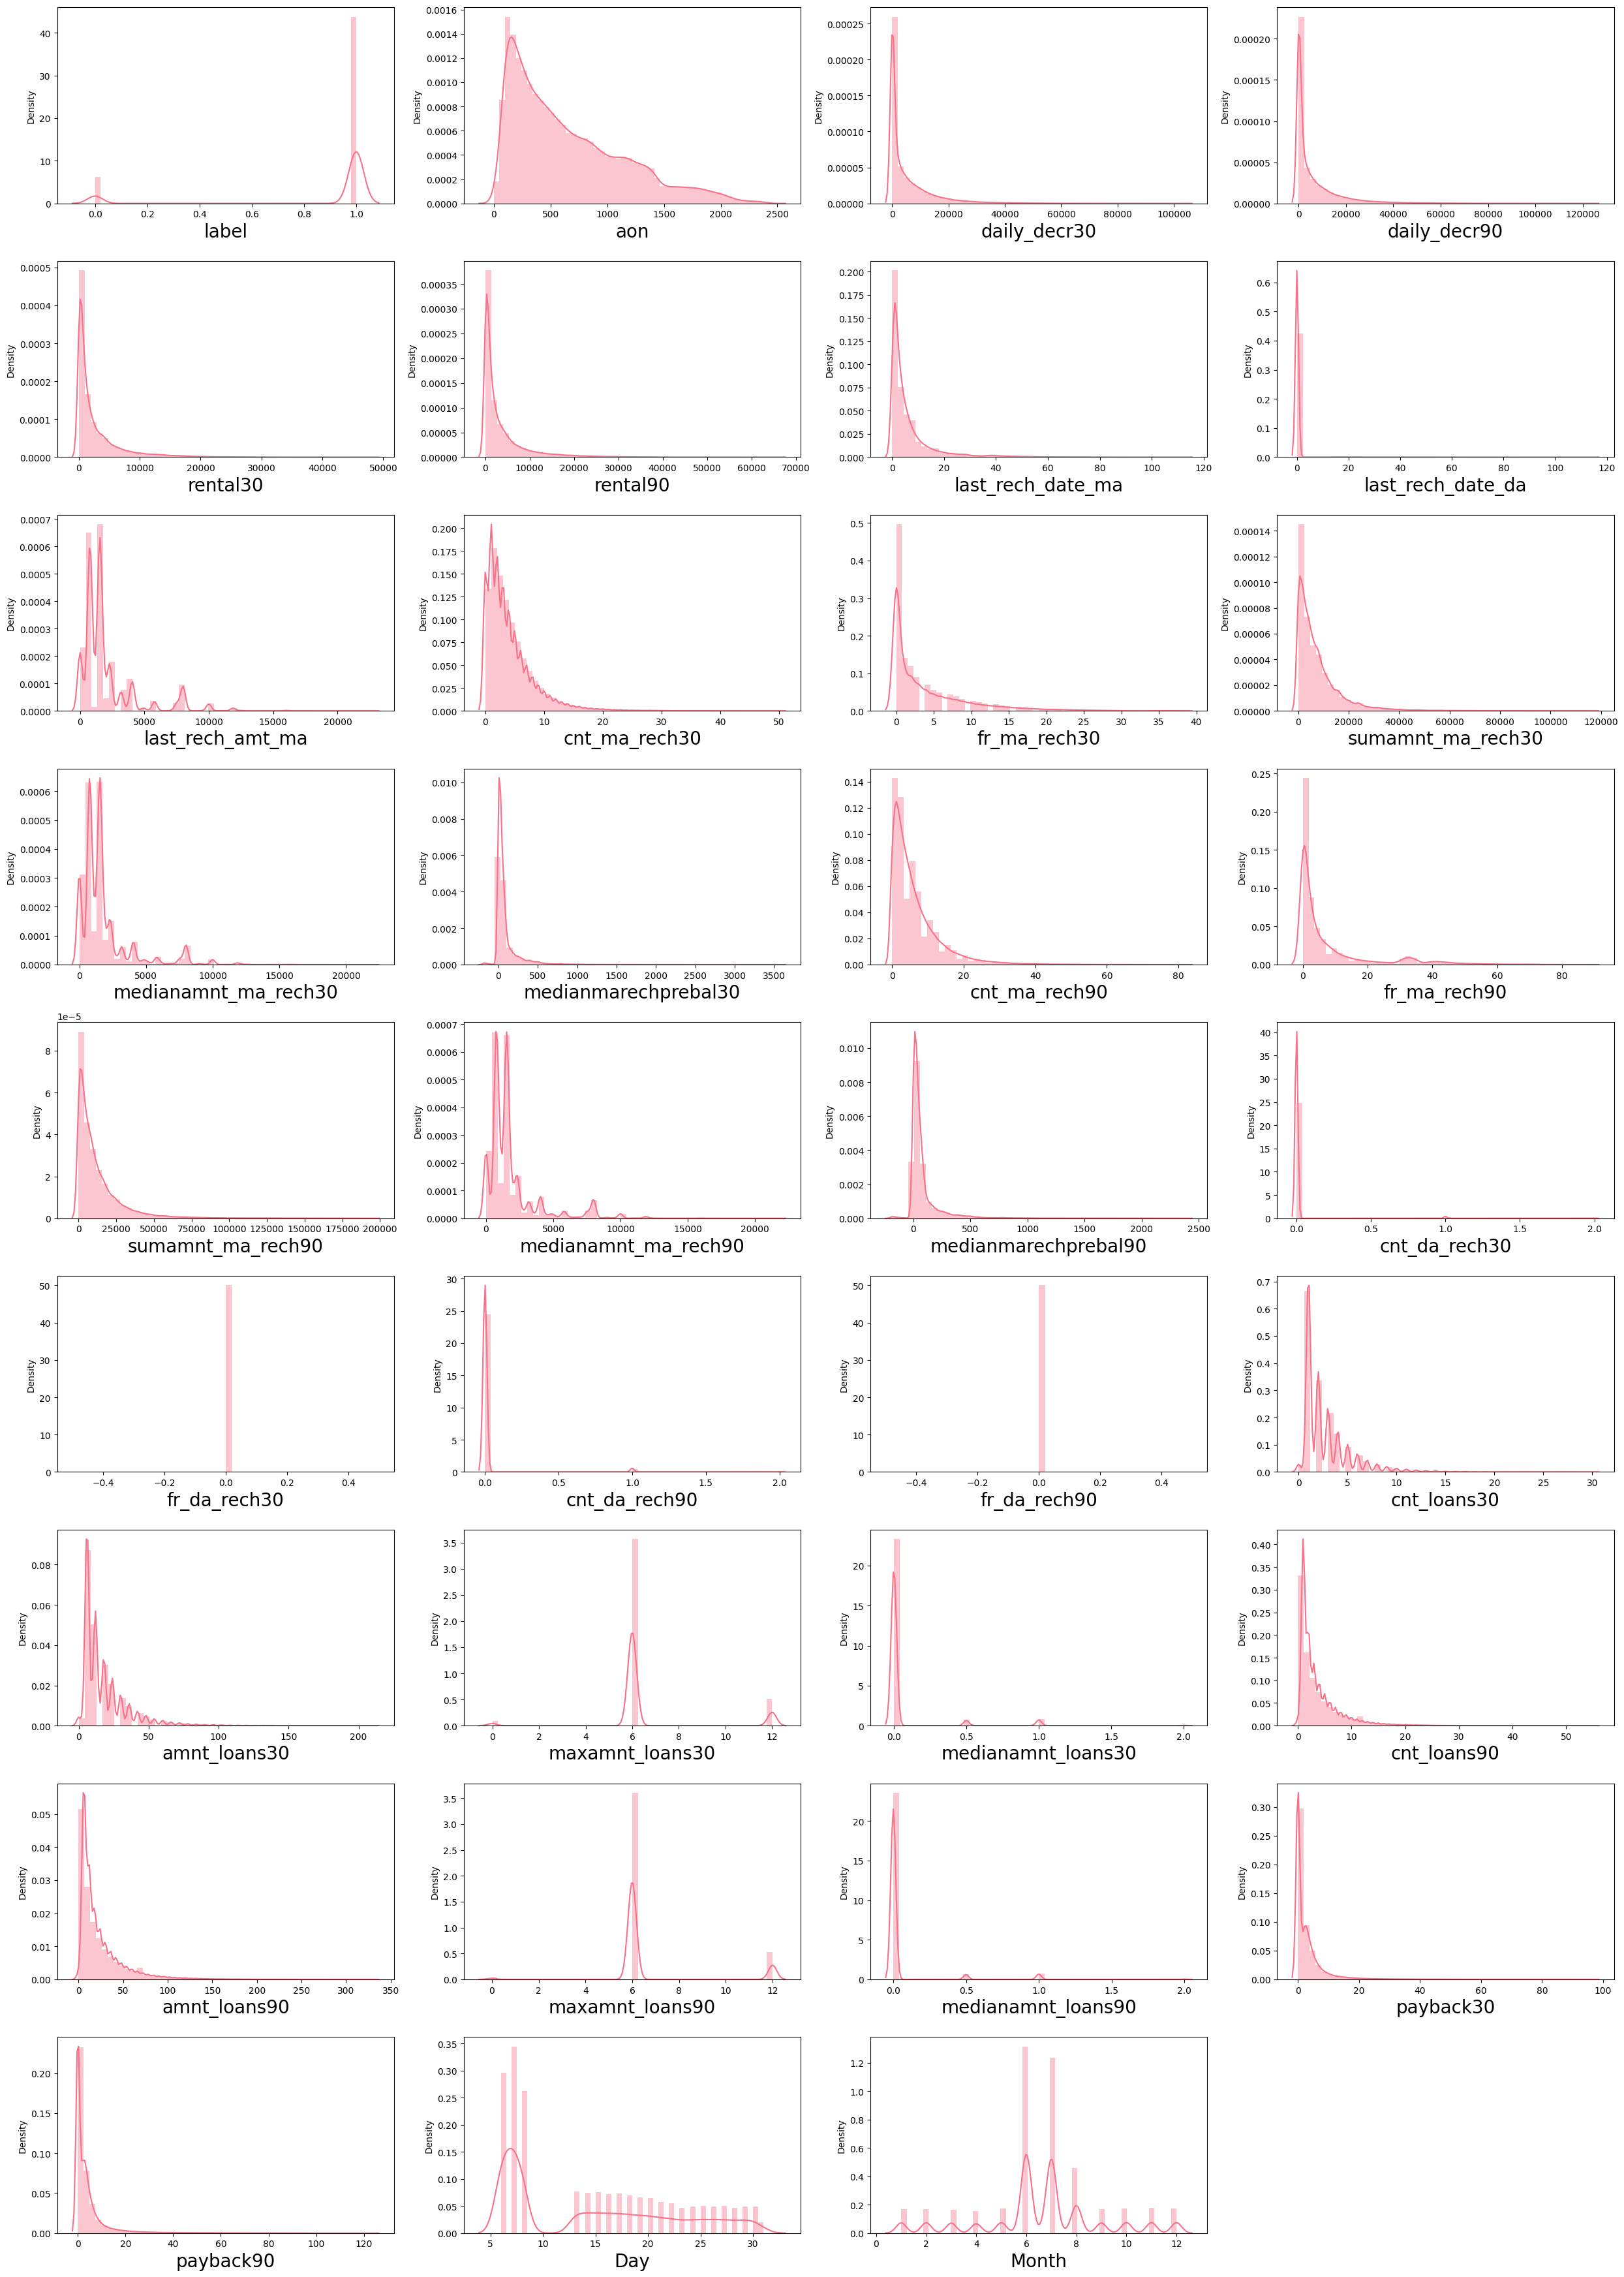

In [46]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [47]:
data.skew()

label                   -2.271908
aon                      0.953359
daily_decr30             3.105440
daily_decr90             3.271934
rental30                 3.099030
rental90                 3.254858
last_rech_date_ma        3.474759
last_rech_date_da       10.002349
last_rech_amt_ma         2.299548
cnt_ma_rech30            2.353904
fr_ma_rech30             2.022702
sumamnt_ma_rech30        3.126539
medianamnt_ma_rech30     2.511191
medianmarechprebal30     6.367321
cnt_ma_rech90            2.583006
fr_ma_rech90             2.282754
sumamnt_ma_rech90        3.170519
medianamnt_ma_rech90     2.528494
medianmarechprebal90     5.600052
cnt_da_rech30           10.650435
fr_da_rech30             0.000000
cnt_da_rech90            7.349590
fr_da_rech90             0.000000
cnt_loans30              2.502413
amnt_loans30             2.643728
maxamnt_loans30          1.248748
medianamnt_loans30       4.534407
cnt_loans90              2.797465
amnt_loans90             2.876427
maxamnt_loans9

In [48]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'Day', 'Month'],
      dtype='object')

In [49]:
# Droping unncessary columns
data.drop(['fr_da_rech30'],axis=1,inplace=True)
data.drop(['fr_da_rech90'],axis=1,inplace=True)

**All features are skew except few one like day, month, fr_da_rech90,fr_da_rech30.**

**We will use PowerTransformer to transform skewness in features.**

In [50]:
skew_fea=['aon','daily_decr30', 'daily_decr90', 'rental30','rental90','last_rech_date_ma', 'last_rech_date_da',
          'last_rech_amt_ma','cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30','medianamnt_ma_rech30', 
          'medianmarechprebal30', 'cnt_ma_rech90','fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
          'medianmarechprebal90', 'cnt_da_rech30','cnt_da_rech90', 'cnt_loans30', 'amnt_loans30',
          'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
          'maxamnt_loans90','medianamnt_loans90', 'payback30', 'payback90']

In [51]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
data[skew_fea] = scaler.fit_transform(data[skew_fea].values)

In [52]:
data.skew()

label                  -2.271908
aon                    -0.056858
daily_decr30           -0.130882
daily_decr90           -0.120816
rental30               -0.044562
rental90               -0.044552
last_rech_date_ma       0.041791
last_rech_date_da       6.421015
last_rech_amt_ma       -0.083886
cnt_ma_rech30          -0.001233
fr_ma_rech30            0.136359
sumamnt_ma_rech30      -0.314228
medianamnt_ma_rech30   -0.206002
medianmarechprebal30    1.286913
cnt_ma_rech90          -0.003740
fr_ma_rech90            0.143563
sumamnt_ma_rech90      -0.214062
medianamnt_ma_rech90   -0.066142
medianmarechprebal90    1.464515
cnt_da_rech30           9.681389
cnt_da_rech90           6.688823
cnt_loans30             0.036997
amnt_loans30            0.002737
maxamnt_loans30         0.427387
medianamnt_loans30      3.452247
cnt_loans90             0.097595
amnt_loans90           -0.008161
maxamnt_loans90         0.367231
medianamnt_loans90      3.782959
payback30               0.296427
payback90 

#### 3. Corrleation

In [53]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,Day,Month
label,1.000000,0.102185,0.268143,0.270628,0.144527,0.159672,0.067789,0.027738,0.263310,0.345216,0.245368,0.358906,0.279250,0.130770,0.362887,0.221343,0.368844,0.254778,0.120481,0.015630,0.024407,0.234153,0.232136,0.061452,0.046535,0.269459,0.263466,0.069272,0.036254,0.234465,0.242820,0.021477,0.004917
aon,0.102185,1.000000,0.118006,0.118686,0.084513,0.092395,0.066388,0.009568,0.099651,0.040823,0.073256,0.082927,0.099293,0.021882,0.062546,0.077413,0.101138,0.105037,0.017935,0.012723,0.020968,0.078081,0.078428,0.034012,-0.002303,0.118780,0.117056,0.040877,-0.009895,0.083223,0.113250,0.020902,0.014574
daily_decr30,0.268143,0.118006,1.000000,0.998269,0.581151,0.637900,0.127039,0.052008,0.377756,0.496305,0.300047,0.555073,0.389906,0.120044,0.627472,0.221856,0.664010,0.367207,0.081629,-0.000255,0.043670,0.340419,0.392257,0.297801,0.008698,0.494980,0.524457,0.320128,-0.029339,0.329613,0.405428,0.014265,0.167623
daily_decr90,0.270628,0.118686,0.998269,1.000000,0.581397,0.643209,0.131239,0.052159,0.377242,0.491612,0.299273,0.549521,0.386693,0.120065,0.631170,0.223051,0.667071,0.367462,0.081748,-0.001195,0.043415,0.333662,0.386101,0.296596,0.010347,0.495488,0.525144,0.320650,-0.028993,0.327047,0.406148,0.005623,0.174643
rental30,0.144527,0.084513,0.581151,0.581397,1.000000,0.973215,0.056552,0.016728,0.284149,0.455258,0.252911,0.479516,0.321719,0.078340,0.510499,0.165101,0.516842,0.271904,0.039384,0.012333,0.010556,0.309876,0.338572,0.206974,-0.023155,0.401671,0.415104,0.221842,-0.050595,0.308995,0.344320,0.109027,0.112350
rental90,0.159672,0.092395,0.637900,0.643209,0.973215,1.000000,0.090960,0.023879,0.295631,0.446775,0.255100,0.468402,0.313563,0.078791,0.538760,0.178968,0.543064,0.282979,0.042660,0.006754,0.016224,0.293081,0.326468,0.214027,-0.017917,0.415439,0.430637,0.233830,-0.050120,0.305906,0.361306,0.091208,0.136603
last_rech_date_ma,0.067789,0.066388,0.127039,0.131239,0.056552,0.090960,1.000000,0.033928,0.526551,-0.014356,0.061811,0.117979,0.328460,0.082517,0.104523,0.220981,0.256562,0.515492,0.130362,0.013824,0.033080,-0.105280,-0.107254,-0.021382,0.032966,-0.046265,-0.053897,-0.013516,0.026746,-0.097832,-0.025157,0.042260,-0.007925
last_rech_date_da,0.027738,0.009568,0.052008,0.052159,0.016728,0.023879,0.033928,1.000000,0.025375,0.004672,0.015869,0.012854,0.019461,0.027098,0.010301,0.020499,0.019482,0.024997,0.031467,0.671517,0.961435,0.000568,0.003634,0.016645,0.007179,0.004689,0.006235,0.017424,0.004807,0.006217,0.023803,0.032057,0.008342
last_rech_amt_ma,0.263310,0.099651,0.377756,0.377242,0.284149,0.295631,0.526551,0.025375,1.000000,0.326669,0.278042,0.654749,0.813790,0.214699,0.378529,0.340054,0.703895,0.904356,0.230567,0.009298,0.023921,0.146048,0.163878,0.130927,0.036199,0.195120,0.201801,0.143433,0.023744,0.147000,0.184039,0.062683,0.041356
cnt_ma_rech30,0.345216,0.040823,0.496305,0.491612,0.455258,0.446775,-0.014356,0.004672,0.326669,1.000000,0.426293,0.858889,0.420180,0.147155,0.921499,0.226083,0.780084,0.292473,0.096232,-0.008775,0.002069,0.698560,0.693440,0.178294,-0.047779,0.694786,0.686595,0.183055,-0.062256,0.546146,0.491135,0.108137,0.043868


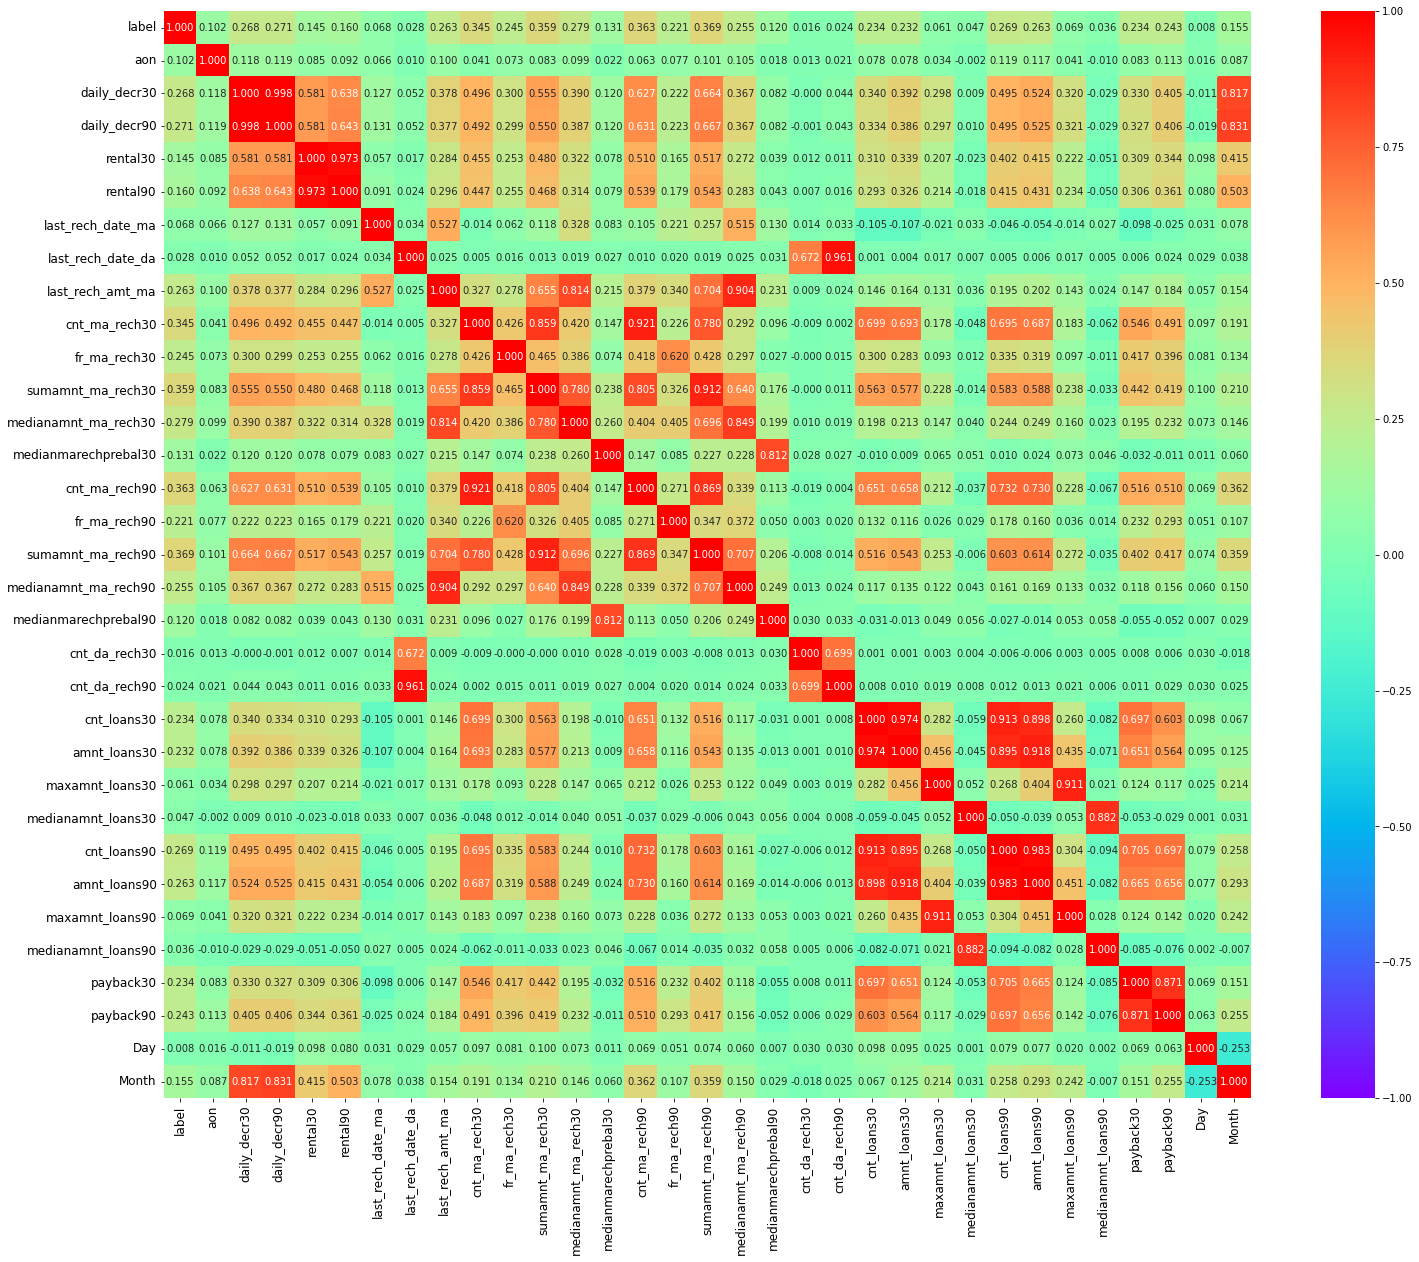

In [81]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rainbow")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

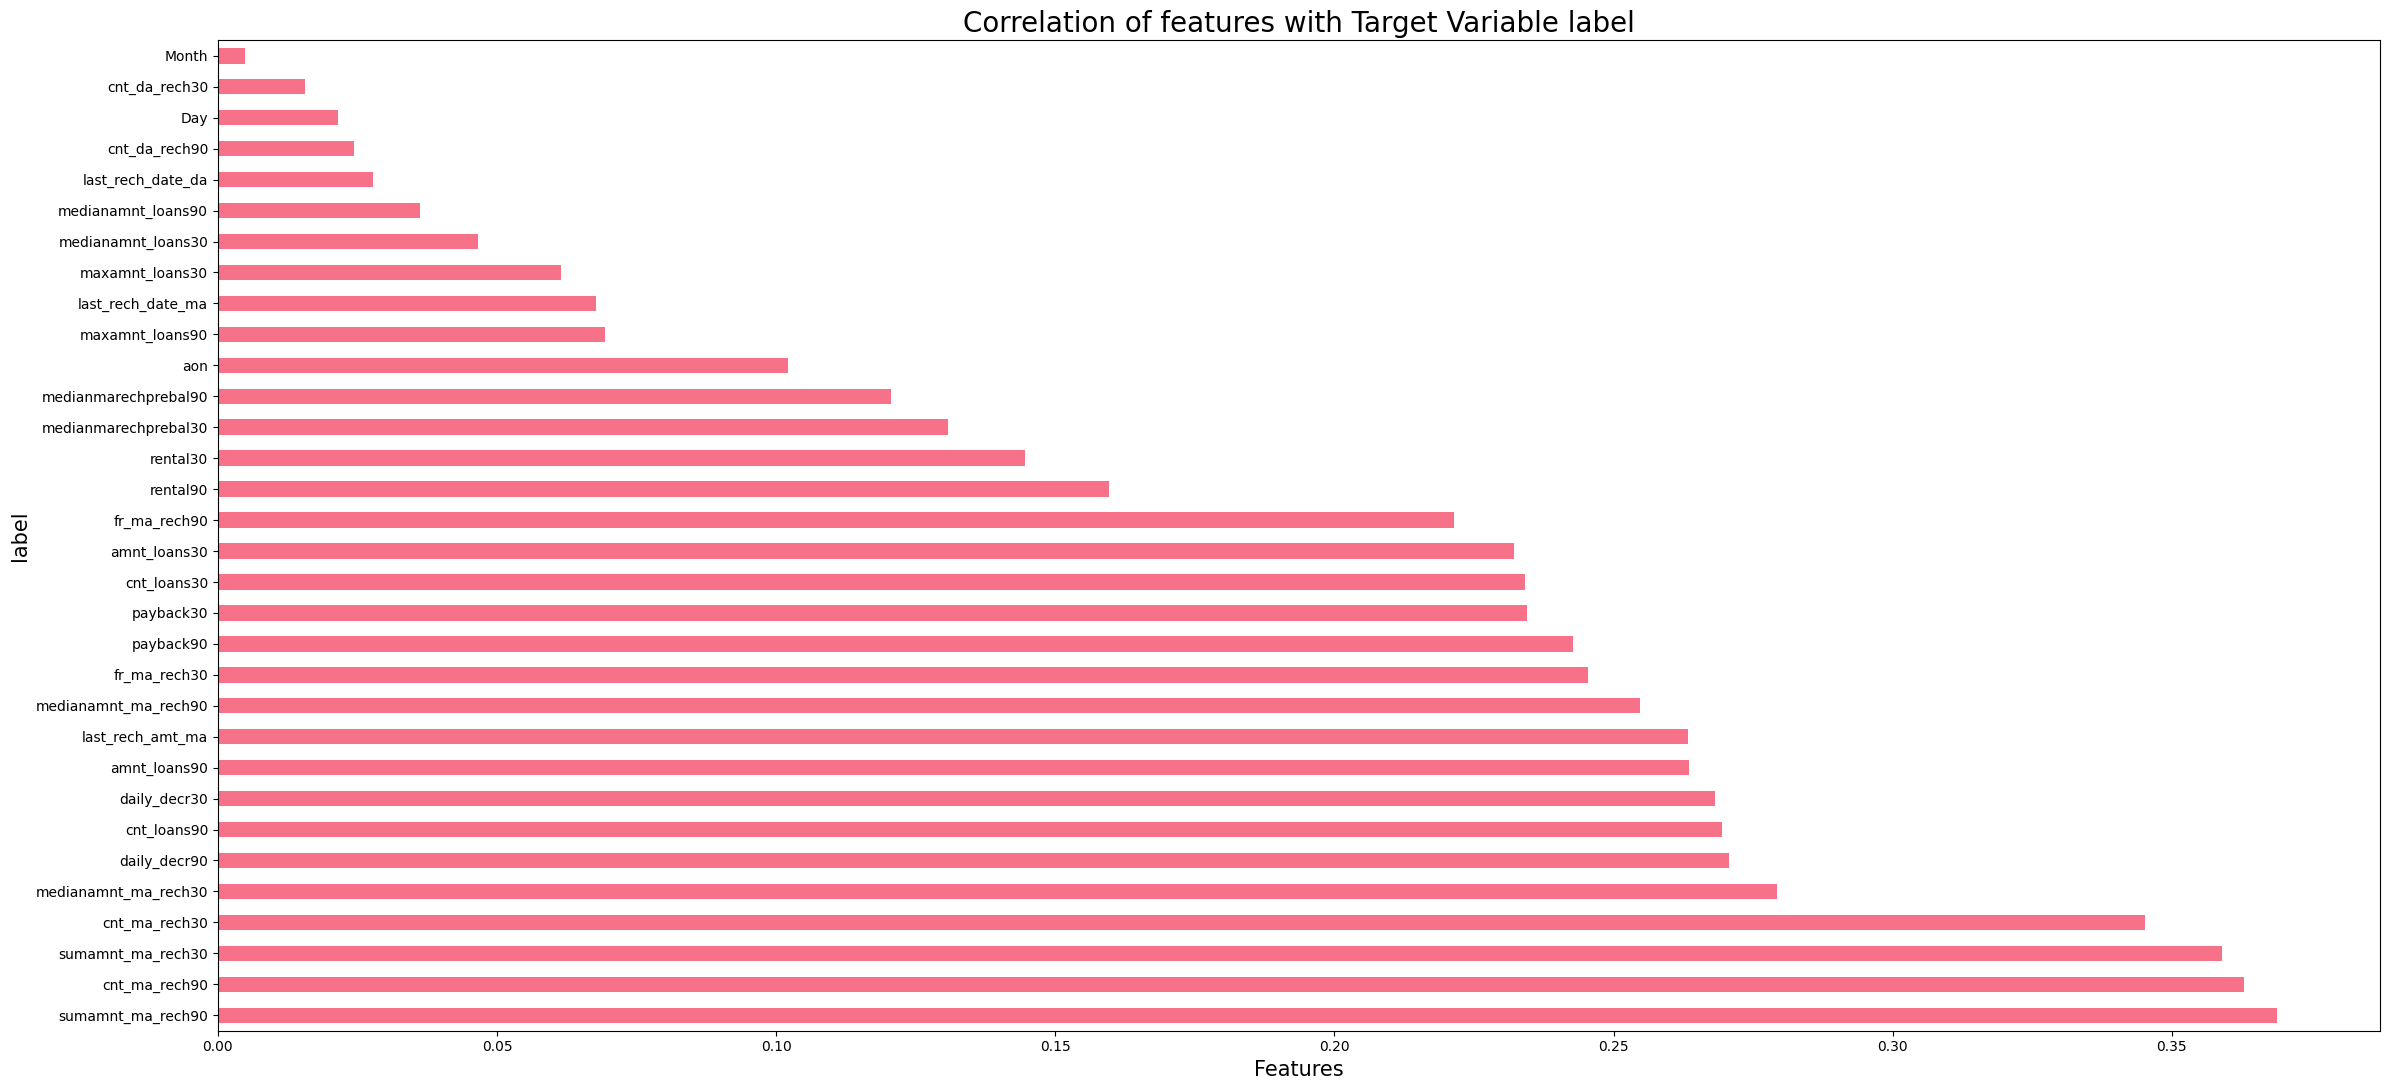

In [56]:
plt.figure(figsize = (24,11))
data.corr()['label'].drop(['label']).sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Features',fontsize=15)
plt.ylabel('label',fontsize=15)
plt.title('Correlation of features with Target Variable label',fontsize = 20)
plt.show()

#### 5. Standard Scaling

In [57]:
# Splitting data in target and dependent feature
X = data.drop(['label'], axis =1)
y = data['label']

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

#### 4. Balanceing Imbalanced target feature

In [59]:
data.label.value_counts()

1    173461
0     24713
Name: label, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [61]:
# Oversampleing using SMOTE Technique
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_scale, y = oversample.fit_resample(X_scale, y)

In [62]:
data.shape

(198174, 33)

In [63]:
y.value_counts()

0    173461
1    173461
Name: label, dtype: int64

#### 6. Checking Multicollinearity between features using variance_inflation_factor

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.057617,aon
1,730.497287,daily_decr30
2,758.080477,daily_decr90
3,46.579965,rental30
4,51.005649,rental90
5,2.907545,last_rech_date_ma
6,18.600695,last_rech_date_da
7,13.256760,last_rech_amt_ma
8,86.921798,cnt_ma_rech30
9,2.753289,fr_ma_rech30


#### Observation :
- `daily_decr30` and `daily_decr90` are highly correlated with each other.
- `cnt_loans90` and `amnt_loans90` are highly correlated with each other.
- `cnt_loans30` and `amnt_loans30` are highly correlated with each other.
- `cnt_ma_rech30` and `sumamnt_ma_rech30` are highly correlated with each other.

#### Handling Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderately or poorly.
2. Another way to address Multicollinerity is to apply PCA.

### 7. PCA

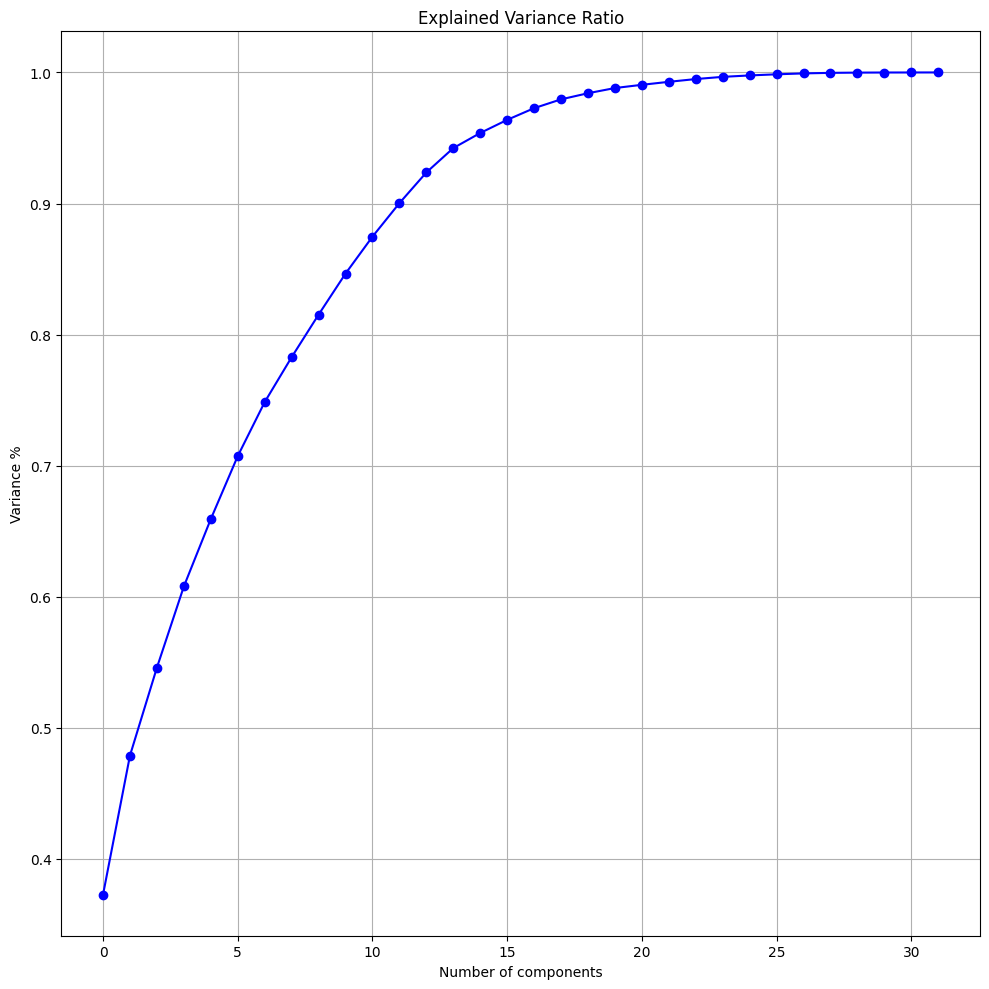

In [65]:
#plot the graph to find the principal components
from sklearn.decomposition import PCA
pca =PCA()
x_pca =pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()

#### Observation -
- We can see that 12 principal components attribute for 90% of variation in the data.
- We will use the first 12 components for our prediction.

In [66]:
pca_new = PCA(n_components=11)
x_new = pca_new.fit_transform(X_scale)

In [67]:
principle_x=pd.DataFrame(x_new,columns=np.arange(11))

###  Model Building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [69]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=99, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (232437, 11)
Training target vector size: (232437,)
Test feature matrix size: (114485, 11)
Test target vector size: (114485,)


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(principle_x,y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7619862864130672 on Random_state 244


#### Logistic Regression

In [85]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=244, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7619862864130672


Confusion matrix of Logistics Regression : 
 [[43769 13611]
 [13638 43467]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76     57380
           1       0.76      0.76      0.76     57105

    accuracy                           0.76    114485
   macro avg       0.76      0.76      0.76    114485
weighted avg       0.76      0.76      0.76    114485



#### Cross Validation on LR

In [86]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, principle_x, y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.75614326 0.75849247 0.75920962 0.75915197 0.7605644 ]
Mean CV Score : 0.7587123410707708
Std deviation : 0.001450460969884523


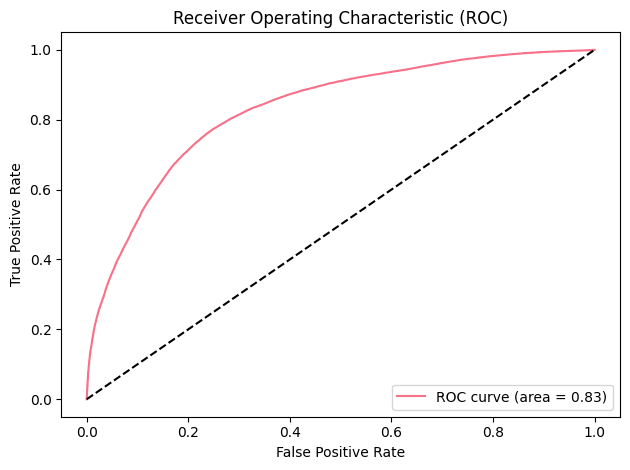

AUC Score: 0.8305136154532283


In [87]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score
auc_score = auc(fpr, tpr)
print("AUC Score:", auc_score)

####  Decision Tree Classifier

In [92]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=244, test_size=.33)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8420841158230336


Confusion matrix of Decision Tree Classifier : 
 [[49624  7756]
 [10323 46782]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85     57380
           1       0.86      0.82      0.84     57105

    accuracy                           0.84    114485
   macro avg       0.84      0.84      0.84    114485
weighted avg       0.84      0.84      0.84    114485



#### Cross Validation of Decision Tree Classifier

In [89]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, principle_x, y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.85440657 0.85460834 0.85503863 0.85172374 0.85136343]
Mean CV Score : 0.8534281418917423
Std deviation : 0.0015563994015575522


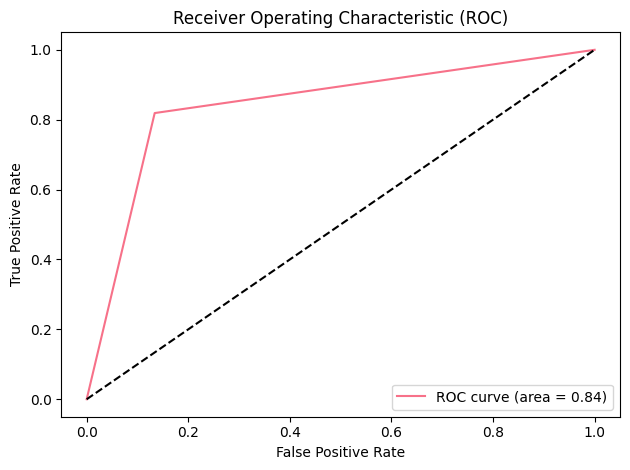

AUC Score: 0.8425272394954705


In [90]:
y_pred_prob = dtc.predict_proba(X_test)[:, 1]  # Probability of positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

#### Random Forest Classifier 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=244, test_size=.33)
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 0.9134122374110145


Confusion matrix of Random Forest Classifier : 
 [[52947  4433]
 [ 5480 51625]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     57380
           1       0.92      0.90      0.91     57105

    accuracy                           0.91    114485
   macro avg       0.91      0.91      0.91    114485
weighted avg       0.91      0.91      0.91    114485



 #### Cross Validation Random Forest Classifier

In [37]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, principle_x, y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.9241767  0.92854363 0.926006   0.92648161 0.92504036]
Mean CV Score : 0.926049657787592
Std deviation : 0.0014788565435022586


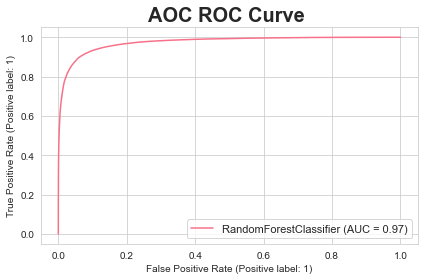

Auc Score :
 0.9189350042072305


In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(rfc,X_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve ',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(y_test, rfc.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

###  Extra Tree Classifier

In [95]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=244, test_size=.33)
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9308118967550334


Confusion matrix of Extra Trees Classifier : 
 [[53965  3415]
 [ 4506 52599]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     57380
           1       0.94      0.92      0.93     57105

    accuracy                           0.93    114485
   macro avg       0.93      0.93      0.93    114485
weighted avg       0.93      0.93      0.93    114485



#### Cross Validation Extra Tree Classifier

In [96]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, principle_x, y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.94129855 0.93900699 0.93685864 0.93639744 0.93721896]
Mean CV Score : 0.9381561158032354
Std deviation : 0.0018029718422138802


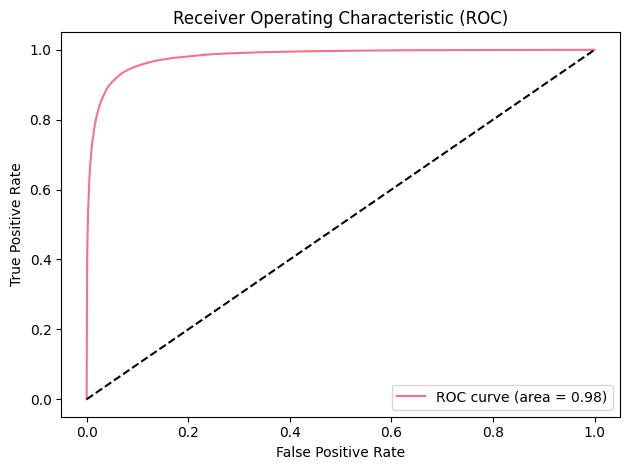

AUC Score: 0.9806125662250892


In [97]:
y_pred_prob = etc.predict_proba(X_test)[:, 1]  # Probability of positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

**Extra Tree classifier gives maximum accuracy and cross validation score.**

## Hyper Parameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'] }

In [100]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 1/5; 1/6] END criterion=gini, max_features=auto;, score=0.922 total time=  44.0s
[CV 2/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 2/5; 1/6] END criterion=gini, max_features=auto;, score=0.920 total time=  44.1s
[CV 3/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 3/5; 1/6] END criterion=gini, max_features=auto;, score=0.920 total time=  44.4s
[CV 4/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 4/5; 1/6] END criterion=gini, max_features=auto;, score=0.922 total time=  44.3s
[CV 5/5; 1/6] START criterion=gini, max_features=auto...........................
[CV 5/5; 1/6] END criterion=gini, max_features=auto;, score=0.922 total time=  44.3s
[CV 1/5; 2/6] START criterion=gini, max_features=sqrt...........................
[CV 1/5; 2/6] END criterion=g

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=10)

In [101]:
GCV.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt'}

## Extra Tree Classifier model based on Hyper Parameter Tuning

In [102]:
X_train, X_test, y_train, y_test = train_test_split(principle_x, y, random_state=244, test_size=.33)
etc=ExtraTreesClassifier(criterion='entropy', max_features = 'auto')
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(y_test, y_pred))

Extra Trees Classifier Evaluation


Accuracy Score of Extra Trees Classifier : 0.9305673232301175


Confusion matrix of Extra Trees Classifier : 
 [[53973  3407]
 [ 4542 52563]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     57380
           1       0.94      0.92      0.93     57105

    accuracy                           0.93    114485
   macro avg       0.93      0.93      0.93    114485
weighted avg       0.93      0.93      0.93    114485



In [29]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, principle_x, y, cv =5)
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

CVScore : [0.94343158 0.94102472 0.93962585 0.94043295 0.94089415]
Mean CV Score : 0.941081850408467
Std deviation : 0.0012728484101100725


## Final Model AOC ROC

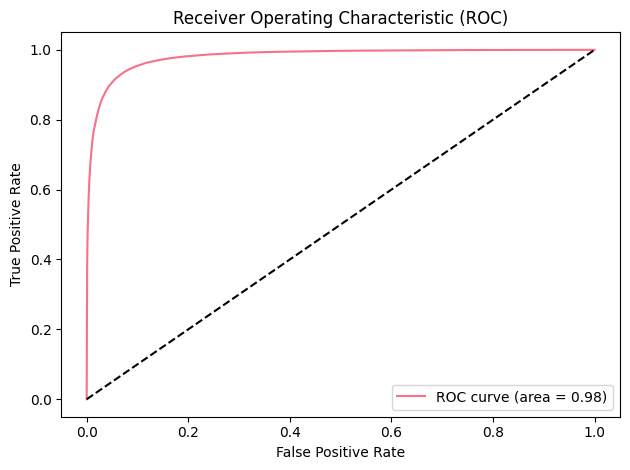

AUC Score: 0.9805644239700925


In [103]:
y_pred_prob = etc.predict_proba(X_test)[:, 1]  # Probability of positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

## Saving Final Model

In [104]:
import joblib
joblib.dump(etc,'Micro_Credit_Defaulter_Final.pkl')

['Micro_Credit_Defaulter_Final.pkl']

## Prediction Using Final Model

In [105]:
# Prediction
prediction = etc.predict(X_test)

In [106]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred

,Predicted Values,Actual Values
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
114480,1,1
114481,0,0
114482,0,0
114483,0,0
